# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Rabu, 03 Juli - Jum'at, 05 Juli 2024
3. Tempat di Kost
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [ ]:
# pip install tensorflow

In [ ]:
# pip install keras

In [ ]:
# pip install opencv-python

In [ ]:
# pip install imutils

In [ ]:
# pip install matplotlib

In [ ]:
# pip install seaborn

In [ ]:
# pip install scikit-learn

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [2]:
import os
import pandas as pd
import cv2

def convert_to_png(image_path, output_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # Create the output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    # Save the image as PNG
    cv2.imwrite(output_path, image)

def get_last_n_parts(path, n):
    return os.path.join(*path.split(os.sep)[-n:])

def create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR):
    # List to store image file paths and their corresponding labels and dimensions
    data = []

    # Traverse the dataset directory
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                # Get the class label from the subdirectory name
                label = os.path.basename(root)
                # Get the full file path
                file_path = os.path.join(root, file)
                
                # Create a new file path for the PNG image
                relative_path = os.path.relpath(file_path, DATASET_PATH)
                png_file_path = os.path.join(OUTPUT_IMAGE_DIR, os.path.splitext(relative_path)[0] + '.png')
                
                # Convert the image to PNG
                convert_to_png(file_path, png_file_path)
                
                # Get image dimensions
                img = cv2.imread(file_path)
                height, width, _ = img.shape
                
                # Get only the last 3 parts of the path for CSV
                csv_path = get_last_n_parts(png_file_path, 2)
                
                # Append to the data list including dimensions
                data.append([csv_path, width, height, label])
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['file_path', 'width', 'height', 'label'])
    
    # Save the DataFrame to a CSV file
    df.to_csv(OUTPUT_CSV, index=False)
    print(f'Labels CSV file created at: {OUTPUT_CSV}')

# Define the paths for the two datasets and their respective output directories
DATASET_1 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\Data Custom\\Test Data\\"
OUTPUT_CSV_1 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\labels_1.csv"
OUTPUT_IMAGE_DIR_1 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\"

DATASET_2 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\Data Custom\\Train and Val\\"
OUTPUT_CSV_2 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\labels_2.csv"
OUTPUT_IMAGE_DIR_2 = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\"

# Process the first dataset
create_labels_csv(DATASET_1, OUTPUT_CSV_1, OUTPUT_IMAGE_DIR_1)

# Process the second dataset
create_labels_csv(DATASET_2, OUTPUT_CSV_2, OUTPUT_IMAGE_DIR_2)

Labels CSV file created at: C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v2.9_test_data\labels_1.csv
Labels CSV file created at: C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.0\labels_2.csv


In [3]:
import pandas as pd

# Path ke dua file CSV yang berbeda
path_main1 = OUTPUT_IMAGE_DIR_1
file1 = path_main1 + "labels_1.csv"

path_main2 = OUTPUT_IMAGE_DIR_2
file2 = path_main2 + "labels_2.csv"

# Membaca kedua file CSV
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Menampilkan data dari kedua file
print("Data dari file pertama:")
print(df1.head())

print("\nData dari file kedua:")
print(df2.head())

Data dari file pertama:
                                     file_path  width  height label
0  ba\002798ad-631c-4f0c-b899-aa66fb5c2ac1.png    239     167    ba
1  ba\040ab1c7-bffa-4a93-8c42-54e5597f2243.png     96      67    ba
2  ba\0789a0d8-e129-48ec-b74e-2e53f4a7ece9.png    235     166    ba
3  ba\11f6c317-635a-4e64-8552-05bf8b7b3a95.png     96      67    ba
4  ba\13469389-6f9b-43dc-be99-8dfbfaae51cb.png    235     165    ba

Data dari file kedua:
                 file_path  width  height label
0     ba\ba116.pred3.b.png    224     224    ba
1       ba\ba116.pred3.png    224     224    ba
2   ba\ba116.pred3.r10.png    224     224    ba
3    ba\ba116.pred3.r5.png    224     224    ba
4  ba\ba116.pred3.rm10.png    224     224    ba


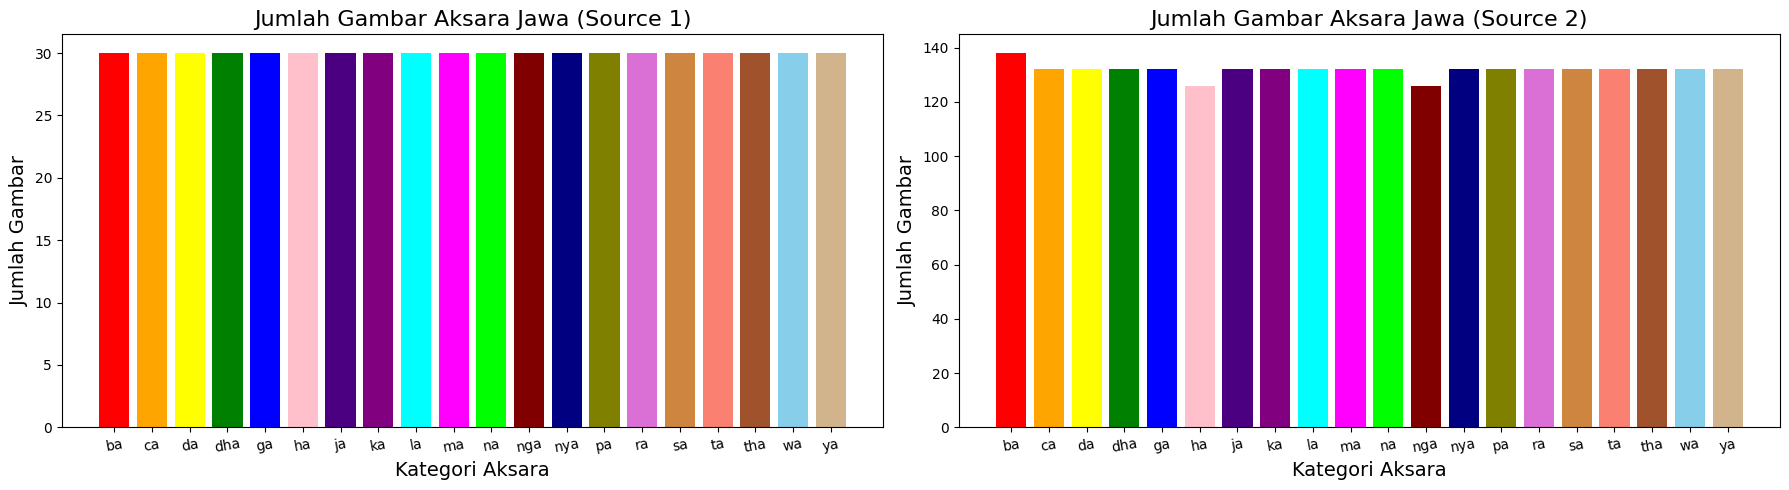

In [4]:
import matplotlib.pyplot as plt
import os

# Define function to count files in each directory
def count_files(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    return num_files

# Define paths for two sources
source_1_paths = [
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\ba",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\ca",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\da",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\dha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\ga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\ha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\ja",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\ka",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\la",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\ma",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\na",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\nga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\nya",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\pa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\ra",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\sa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\ta",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\tha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\wa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v2.9_test_data\\ya"
]

source_2_paths = [
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\ba",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\ca",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\da",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\dha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\ga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\ha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\ja",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\ka",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\la",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\ma",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\na",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\nga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\nya",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\pa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\ra",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\sa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\ta",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\tha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\wa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.0\\ya"
]

# Count files for each path
file_counts_1 = [count_files(path) for path in source_1_paths]
file_counts_2 = [count_files(path) for path in source_2_paths]

# Define categories and colors
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']

# Create bar charts
plt.figure(figsize=(18, 5))

# Plot for Source 1
plt.subplot(1, 2, 1)
plt.bar(aksara_categories, file_counts_1, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa (Source 1)', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Plot for Source 2
plt.subplot(1, 2, 2)
plt.bar(aksara_categories, file_counts_2, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa (Source 2)', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plots
plt.show()

In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input paths and aksara categories for each source
INPUT_PATH_1 = path_main1
INPUT_PATH_2 = path_main2
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (112, 112)
INPUT_SHAPE = (112, 112, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index

def load_images(input_path_1, input_path_2, aksaraJowo, image_size):
    X_original_1, X_grayscale_1, X_filtered_1, y_label_1 = [], [], [], []
    X_original_2, X_grayscale_2, X_filtered_2, y_label_2 = [], [], [], []
    
    # Process images from the first source
    generator_1 = create_image_generator(input_path_1, aksaraJowo, image_size)
    for original_image, grayscale_image, image_filtered, label in generator_1:
        X_original_1.append(original_image)
        X_grayscale_1.append(grayscale_image)
        X_filtered_1.append(image_filtered)
        y_label_1.append(label)
        
    # Process images from the second source
    generator_2 = create_image_generator(input_path_2, aksaraJowo, image_size)
    for original_image, grayscale_image, image_filtered, label in generator_2:
        X_original_2.append(original_image)
        X_grayscale_2.append(grayscale_image)
        X_filtered_2.append(image_filtered)
        y_label_2.append(label)
        
    X_original_1 = np.array(X_original_1)
    X_grayscale_1 = np.array(X_grayscale_1)
    X_filtered_1 = np.array(X_filtered_1)
    y_label_1 = to_categorical(np.array(y_label_1))
    
    X_original_2 = np.array(X_original_2)
    X_grayscale_2 = np.array(X_grayscale_2)
    X_filtered_2 = np.array(X_filtered_2)
    y_label_2 = to_categorical(np.array(y_label_2))
    
    return (X_original_1, X_grayscale_1, X_filtered_1, y_label_1), (X_original_2, X_grayscale_2, X_filtered_2, y_label_2)

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load images with custom preprocessing applied from both sources
(X_original_1, X_grayscale_1, X_filtered_1, y_label_1), (X_original_2, X_grayscale_2, X_filtered_2, y_label_2) = load_images(INPUT_PATH_1, INPUT_PATH_2, AKSARA, IMAGE_SIZE)

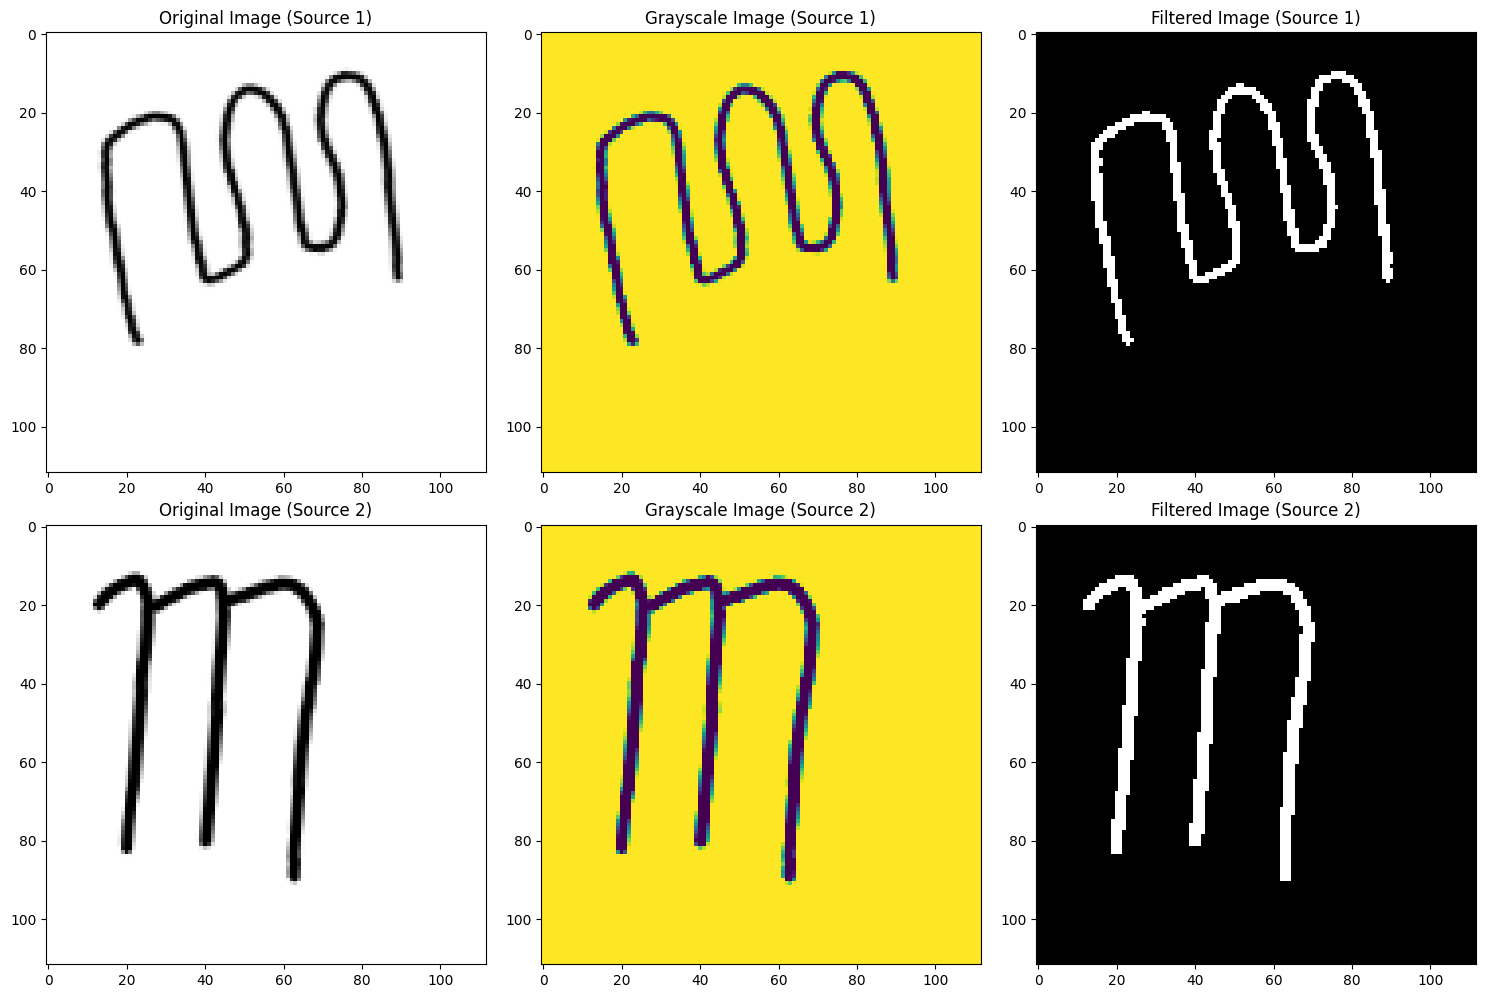

In [6]:
import matplotlib.pyplot as plt

# Select one image index to display
index_to_display = 599

# Display the original image, grayscale image, and filtered image from source 1
original_image_1 = X_original_1[index_to_display]
grayscale_image_1 = X_grayscale_1[index_to_display]
filtered_image_1 = X_filtered_1[index_to_display]

# Display the original image, grayscale image, and filtered image from source 2
original_image_2 = X_original_2[index_to_display]
grayscale_image_2 = X_grayscale_2[index_to_display]
filtered_image_2 = X_filtered_2[index_to_display]

# Plot the images
plt.figure(figsize=(15, 10))

# Plot images from source 1
plt.subplot(2, 3, 1)
plt.title('Original Image (Source 1)')
plt.imshow(original_image_1)
plt.axis('on')

plt.subplot(2, 3, 2)
plt.title('Grayscale Image (Source 1)')
plt.imshow(grayscale_image_1)
plt.axis('on')

plt.subplot(2, 3, 3)
plt.title('Filtered Image (Source 1)')
plt.imshow(filtered_image_1, cmap='gray')
plt.axis('on')

# Plot images from source 2
plt.subplot(2, 3, 4)
plt.title('Original Image (Source 2)')
plt.imshow(original_image_2)
plt.axis('on')

plt.subplot(2, 3, 5)
plt.title('Grayscale Image (Source 2)')
plt.imshow(grayscale_image_2)
plt.axis('on')

plt.subplot(2, 3, 6)
plt.title('Filtered Image (Source 2)')
plt.imshow(filtered_image_2, cmap='gray')
plt.axis('on')

plt.tight_layout()
plt.show()

In [22]:
# Print the shape of the input images from source 1
print(f"Bentuk input pada gambar dari sumber data 1 (Filtered): {X_filtered_1.shape}")

# Print the shape of the input images from source 2
print(f"Bentuk input pada gambar dari sumber data 2 (Filtered): {X_filtered_2.shape}")

Bentuk input pada gambar dari sumber data 1 (Filtered): (600, 112, 112)
Bentuk input pada gambar dari sumber data 2 (Filtered): (2634, 112, 112)


In [23]:
X_filtered_reshaped_1 = X_filtered_1.reshape(-1, 112, 112, 1)   # Reshape X_filtered from source 1
X_filtered_reshaped_2 = X_filtered_2.reshape(-1, 112, 112, 1)   # Reshape X_filtered from source 2

print("X_filtered shape after reshape (Source 1):", X_filtered_reshaped_1.shape)
print("X_filtered shape after reshape (Source 2):", X_filtered_reshaped_2.shape)

X_filtered shape after reshape (Source 1): (600, 112, 112, 1)
X_filtered shape after reshape (Source 2): (2634, 112, 112, 1)


In [24]:
# Use all data from source 1 for testing without splitting
X_test = X_filtered_reshaped_1
y_test = y_label_1

print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_test shape (600, 112, 112, 1)
y_test shape (600, 20)


In [25]:
# Train test split 
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X_filtered_reshaped_2, y_label_2, test_size=0.2, random_state=37)

In [26]:
print("x_train shape", X_train.shape)
print("x_val shape", X_val.shape)
print("y_train shape", y_train.shape)
print("y_val shape", y_val.shape)

x_train shape (2107, 112, 112, 1)
x_val shape (527, 112, 112, 1)
y_train shape (2107, 20)
y_val shape (527, 20)


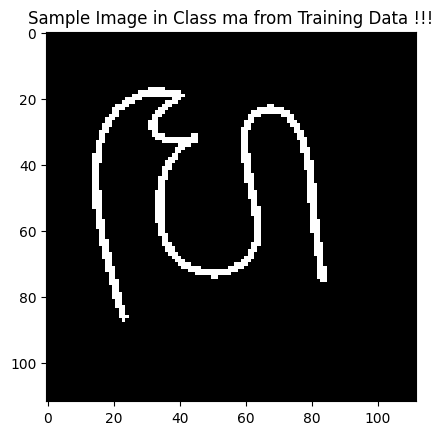

In [27]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

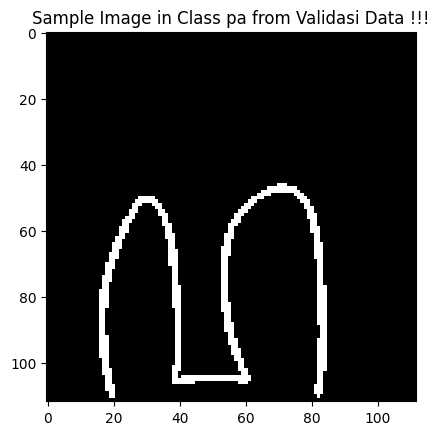

In [28]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_val[0], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_val[0])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1 - Dropout(0.2) + learning_rate=0.0001

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(20, activation='softmax'))

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 110, 110, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 110, 110, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,121,876 (8.09 MB)

 Trainable params: 2,117,844 (8.08 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [31]:
# Train the model
history_v1 = model.fit(X_train, 
                       y_train, 
                       epochs=50, 
                       batch_size=64, 
                       validation_data=(X_val, y_val))

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.0762 - loss: 3.8265 - val_accuracy: 0.0759 - val_loss: 3.2504
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.1887 - loss: 3.0859 - val_accuracy: 0.0816 - val_loss: 2.8925
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.2149 - loss: 2.7970 - val_accuracy: 0.1879 - val_loss: 2.5473
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.2972 - loss: 2.2843 - val_accuracy: 0.2713 - val_loss: 2.1883
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.3637 - loss: 2.0464 - val_accuracy: 0.4801 - val_loss: 1.7345
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.4685 - loss: 1.7202 - val_accuracy: 0.6755 - val_loss: 1.3029
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.5536 - loss: 1.4391 - val_accuracy: 0.7495 - val_loss: 1.0068
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - accuracy: 0.5817 - loss: 1.2561 - val_accuracy: 0.8046 - v

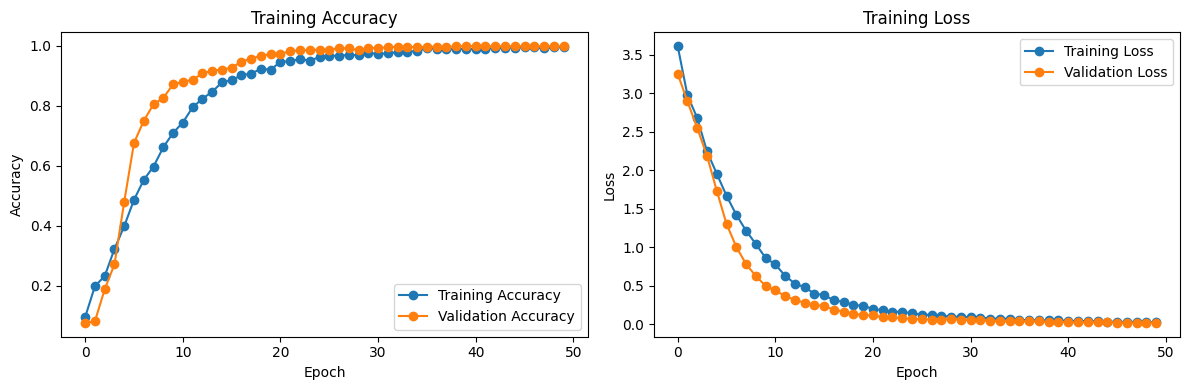

In [33]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v1.history.get('accuracy', [])
test_acc = history_v1.history.get('val_accuracy', [])
loss = history_v1.history.get('loss', [])
test_loss = history_v1.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, test_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Validation Loss', marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [41]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 835ms/step - accuracy: 0.1821 - loss: 5.5607
Loss: 5.158324241638184
Accuracy: 0.23333333432674408


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics
import numpy as np

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Tampilkan classification report yang lengkap
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 503ms/step
              precision    recall  f1-score   support

          ba       0.67      0.07      0.12        30
          ca       0.00      0.00      0.00        30
          da       0.19      0.27      0.22        30
         dha       0.67      0.07      0.12        30
          ga       0.50      0.17      0.25        30
          ha       0.07      0.43      0.13        30
          ja       0.85      0.37      0.51        30
          ka       0.18      0.27      0.21        30
          la       0.67      0.07      0.12        30
          ma       1.00      0.03      0.06        30
          na       0.18      0.43      0.25        30
         nga       0.36      0.30      0.33        30
         nya       0.75      0.10      0.18        30
          pa       0.40      0.13      0.20        30
          ra       0.39      0.90      0.54        30
          sa       0.33      0.37      0.35        30
          ta       0.40      0.07      

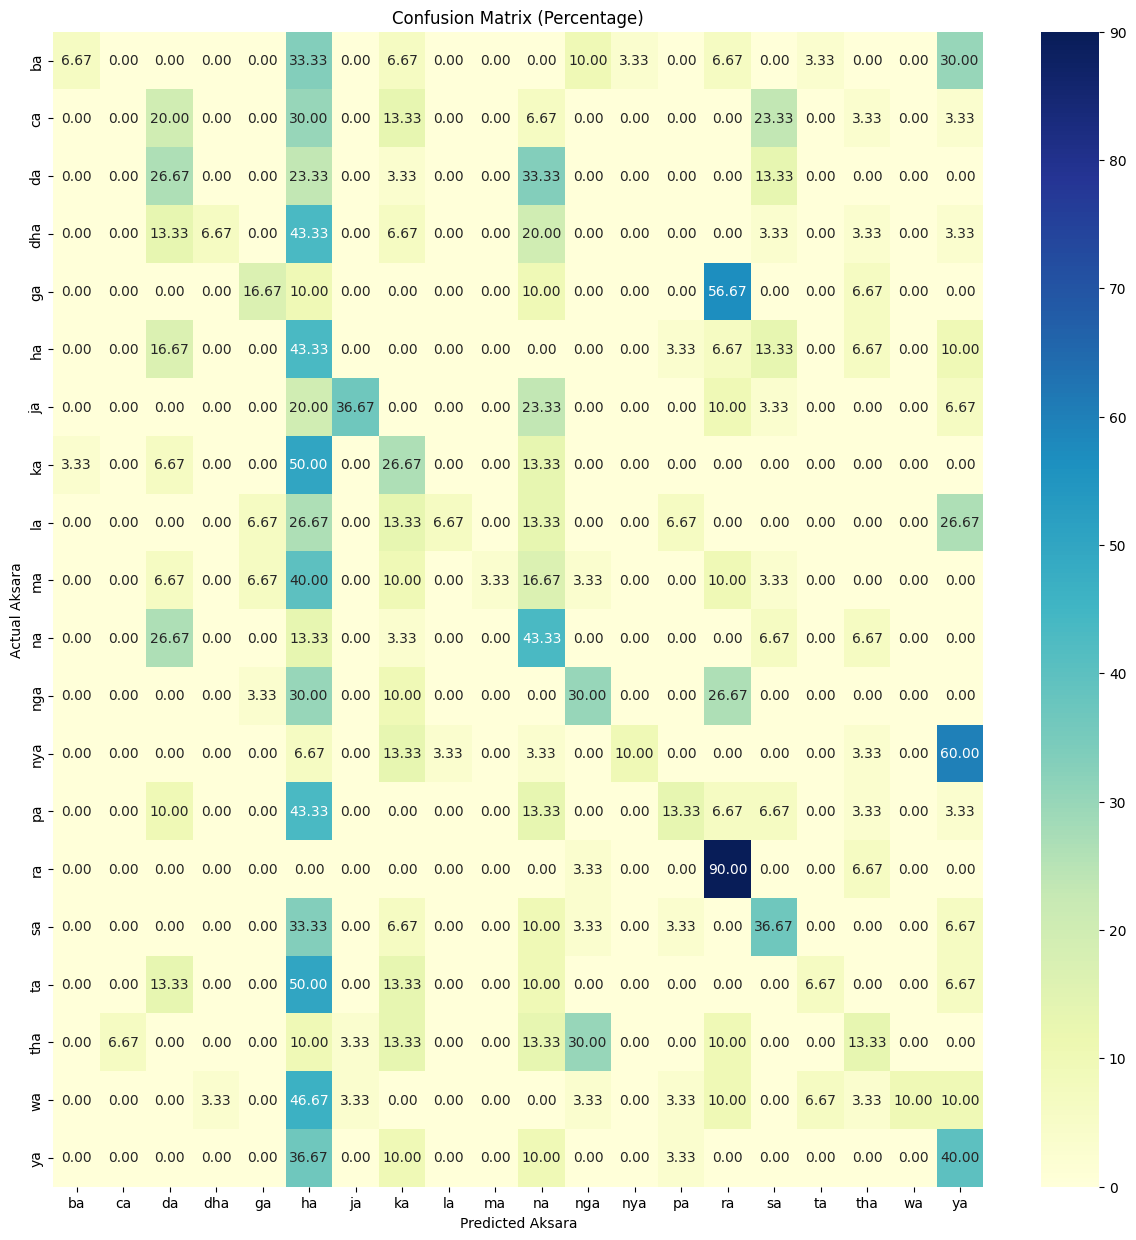

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(conf_matrix, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 2 - Dropout(0.1) + learning_rate=0.0001

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
# Model CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(20, activation='softmax'))

In [62]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 110, 110, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 110, 110, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,121,876 (8.09 MB)

 Trainable params: 2,117,844 (8.08 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [63]:
# Train the model
history_v2 = model.fit(X_train, 
                       y_train, 
                       epochs=35, 
                       batch_size=64, 
                       validation_data=(X_test, y_test))

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 229s 6s/step - accuracy: 0.1064 - loss: 3.5021 - val_accuracy: 0.0645 - val_loss: 3.6553
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.3366 - loss: 2.1813 - val_accuracy: 0.0911 - val_loss: 3.3132
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 169s 5s/step - accuracy: 0.5325 - loss: 1.5117 - val_accuracy: 0.1860 - val_loss: 2.4414
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.6506 - loss: 1.1220 - val_accuracy: 0.4630 - val_loss: 1.7188
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 253s 6s/step - accuracy: 0.7585 - loss: 0.7911 - val_accuracy: 0.7211 - val_loss: 1.0667
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - accuracy: 0.8212 - loss: 0.5720 - val_accuracy: 0.8102 - val_loss: 0.7088
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 260s 6s/step - accuracy: 0.8754 - loss: 0.4251 - val_accuracy: 0.8994 - val_loss: 0.4469
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.9075 - loss: 0.3307 - val_accuracy: 0.9298 - v

In [64]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 553ms/step - accuracy: 0.9898 - loss: 0.0303
Loss: 0.04432501643896103
Accuracy: 0.9848197102546692


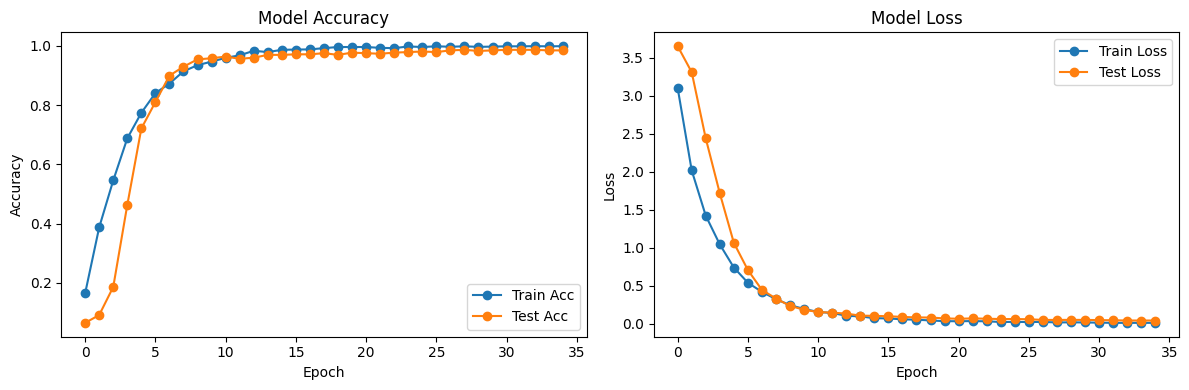

In [68]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v2.history.get('accuracy', [])
test_acc = history_v2.history.get('val_accuracy', [])
loss = history_v2.history.get('loss', [])
test_loss = history_v2.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Train and Test Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc', marker='o')
plt.plot(epochs_range, test_acc, label='Test Acc', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Train and Test Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Test Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [76]:
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step
Precision: 0.9854798299248015
Recall: 0.9848197343453511
F1 Score: 0.9848332782510497
Log Loss: 2.1047044885974873
Accuracy: 0.9848197343453511


              precision    recall  f1-score   support

          ba       1.00      0.96      0.98        28
          ca       1.00      1.00      1.00        28
          da       1.00      1.00      1.00        26
         dha       1.00      1.00      1.00        36
          ga       1.00      1.00      1.00        24
          ha       0.92      0.96      0.94        24
          ja       1.00      1.00      1.00        27
          ka       1.00      0.95      0.97        20
          la       1.00      0.94      0.97        32
          Ma       1.00      1.00      1.00        27
          na       1.00      1.00      1.00        30
         nga       0.94      0.88      0.91        17
         nya       1.00      1.00      1.00        28
          pa       0.92      1.00      0.96        23
          ra       1.00      1.00      1.00        21
          sa       1.00      1.00      1.00        24
          ta       0.96      1.00      0.98        26
         tha       0.93    

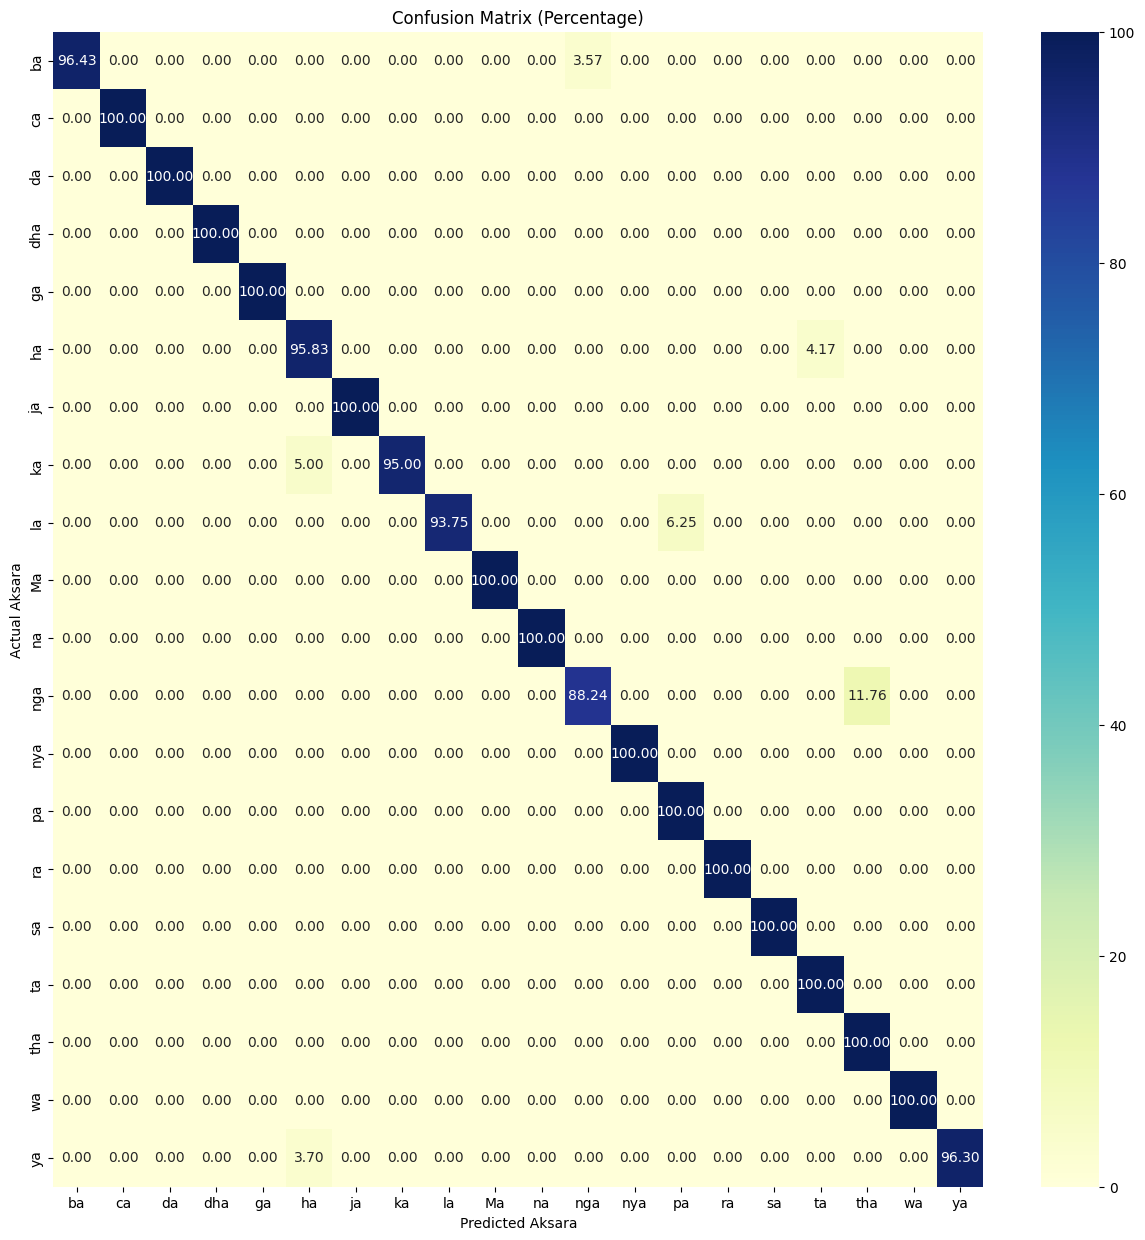

In [78]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 3 - Dropout(0.1) + learning_rate=0.0001 + weight_decay=1e-2

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(20, activation='softmax'))

In [90]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001, weight_decay=1e-2)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 110, 110, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 110, 110, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,121,876 (8.09 MB)

 Trainable params: 2,117,844 (8.08 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [91]:
# Train the model
history_v3 = model.fit(X_train, 
                       y_train, 
                       epochs=35, 
                       batch_size=64, 
                       validation_data=(X_test, y_test))

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.1145 - loss: 3.4513 - val_accuracy: 0.0930 - val_loss: 3.8836
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.3678 - loss: 2.1044 - val_accuracy: 0.1385 - val_loss: 3.0953
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.5879 - loss: 1.3638 - val_accuracy: 0.3302 - val_loss: 2.2905
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.7077 - loss: 0.9500 - val_accuracy: 0.5806 - val_loss: 1.4932
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.7836 - loss: 0.7011 - val_accuracy: 0.7362 - val_loss: 0.9370
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.8572 - loss: 0.4706 - val_accuracy: 0.8425 - val_loss: 0.5765
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.8984 - loss: 0.3608 - val_accuracy: 0.9241 - val_loss: 0.3459
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.9301 - loss: 0.2837 - val_accuracy: 0.9583 - v

In [92]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 407ms/step - accuracy: 0.9908 - loss: 0.0341
Loss: 0.03799917921423912
Accuracy: 0.9905123114585876


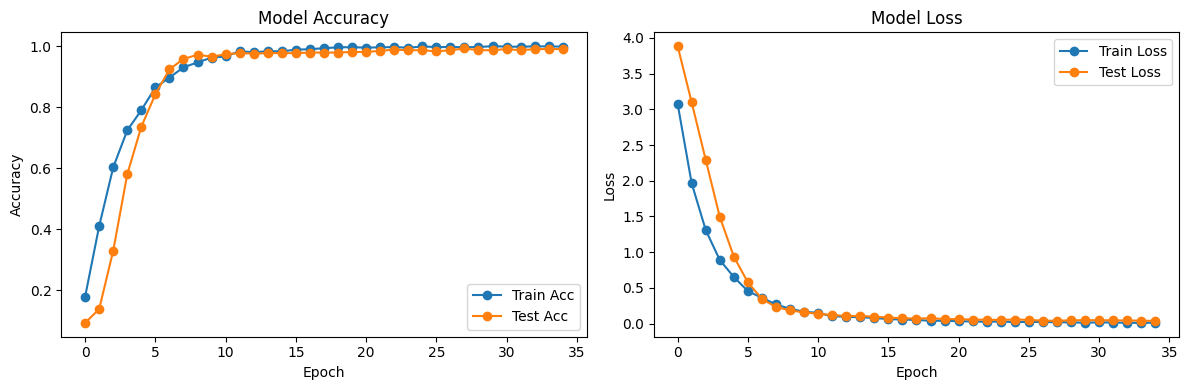

In [93]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v3.history.get('accuracy', [])
test_acc = history_v3.history.get('val_accuracy', [])
loss = history_v3.history.get('loss', [])
test_loss = history_v3.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Train and Test Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc', marker='o')
plt.plot(epochs_range, test_acc, label='Test Acc', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Train and Test Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Test Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [94]:
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 381ms/step
Precision: 0.9922065600433722
Recall: 0.9905123339658444
F1 Score: 0.9908693871681269
Log Loss: 2.100866681829938
Accuracy: 0.9905123339658444


              precision    recall  f1-score   support

          ba       1.00      1.00      1.00        28
          ca       1.00      1.00      1.00        28
          da       1.00      1.00      1.00        26
         dha       1.00      0.97      0.99        36
          ga       1.00      1.00      1.00        24
          ha       1.00      1.00      1.00        24
          ja       1.00      1.00      1.00        27
          ka       1.00      1.00      1.00        20
          la       1.00      0.94      0.97        32
          Ma       1.00      1.00      1.00        27
          na       1.00      1.00      1.00        30
         nga       1.00      1.00      1.00        17
         nya       1.00      1.00      1.00        28
          pa       0.82      1.00      0.90        23
          ra       1.00      1.00      1.00        21
          sa       1.00      1.00      1.00        24
          ta       1.00      1.00      1.00        26
         tha       1.00    

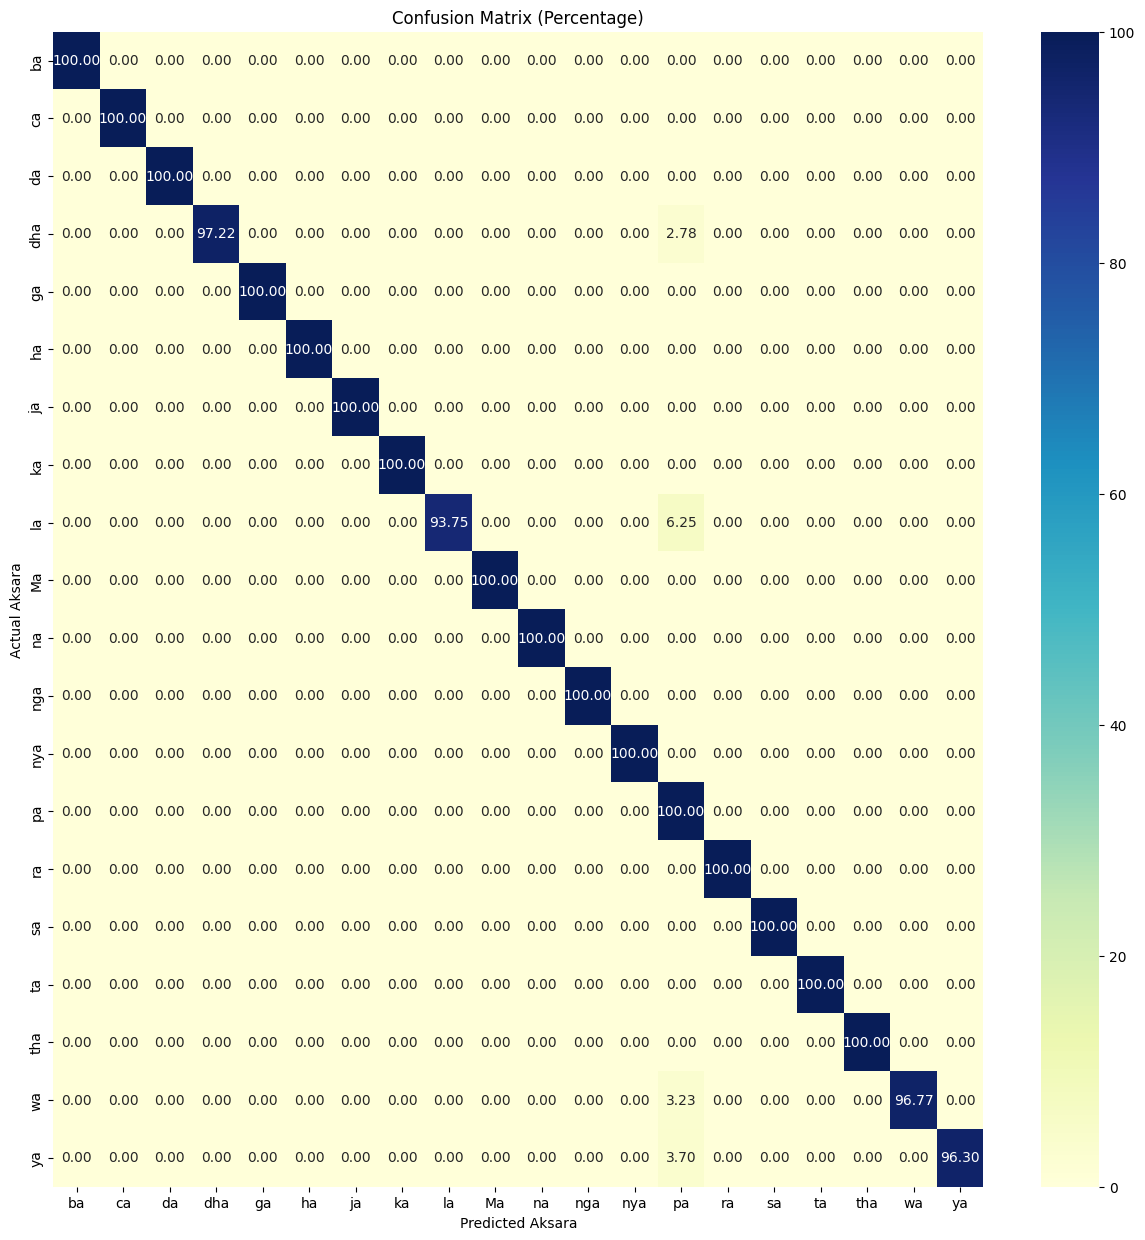

In [95]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

## Model 4 - Dropout(0.1) + learning_rate=0.0001 + weight_decay=1e-2 + clipvalue=0.1

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the CNN model with vgg16 architecture (5 blocks)
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(20, activation='softmax'))

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
# Kompilasi Model
optimizer = Adam(learning_rate=0.0001, weight_decay=1e-2, clipvalue=0.1)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_110 (Conv2D)             │ (None, 110, 110, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_132         │ (None, 110, 110, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_110               │ (None, 55, 55, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_132 (Dropout)           │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 53, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_133         │ (None, 53, 53, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_111               │ (None, 26, 26, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_133 (Dropout)           │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_112 (Conv2D)             │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_134         │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_112               │ (None, 12, 12, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_134 (Dropout)           │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_113 (Conv2D)             │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_135         │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_113               │ (None, 5, 5, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_135 (Dropout)           │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_114 (Conv2D)             │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_136         │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 1, 1, 512)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_136 (Dropout)           │ (None, 1, 1, 512)      │             

 Total params: 2,121,876 (8.09 MB)

 Trainable params: 2,117,844 (8.08 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [110]:
# Train the model
history_v4 = model.fit(X_train, 
                       y_train, 
                       epochs=35, 
                       batch_size=64, 
                       validation_data=(X_test, y_test))

Epoch 1/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 203s 5s/step - accuracy: 0.1372 - loss: 3.3106 - val_accuracy: 0.1139 - val_loss: 3.9009
Epoch 2/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 249s 7s/step - accuracy: 0.4222 - loss: 1.9345 - val_accuracy: 0.1556 - val_loss: 3.3923
Epoch 3/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 226s 6s/step - accuracy: 0.6055 - loss: 1.2592 - val_accuracy: 0.2827 - val_loss: 2.4342
Epoch 4/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step - accuracy: 0.7352 - loss: 0.8501 - val_accuracy: 0.5958 - val_loss: 1.4072
Epoch 5/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 213s 6s/step - accuracy: 0.8035 - loss: 0.6206 - val_accuracy: 0.8027 - val_loss: 0.7444
Epoch 6/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.8875 - loss: 0.3953 - val_accuracy: 0.8994 - val_loss: 0.4317
Epoch 7/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 200s 5s/step - accuracy: 0.9279 - loss: 0.2781 - val_accuracy: 0.9469 - val_loss: 0.2607
Epoch 8/35
33/33 ━━━━━━━━━━━━━━━━━━━━ 176s 5s/step - accuracy: 0.9444 - loss: 0.2391 - val_accuracy: 0.9639 - v

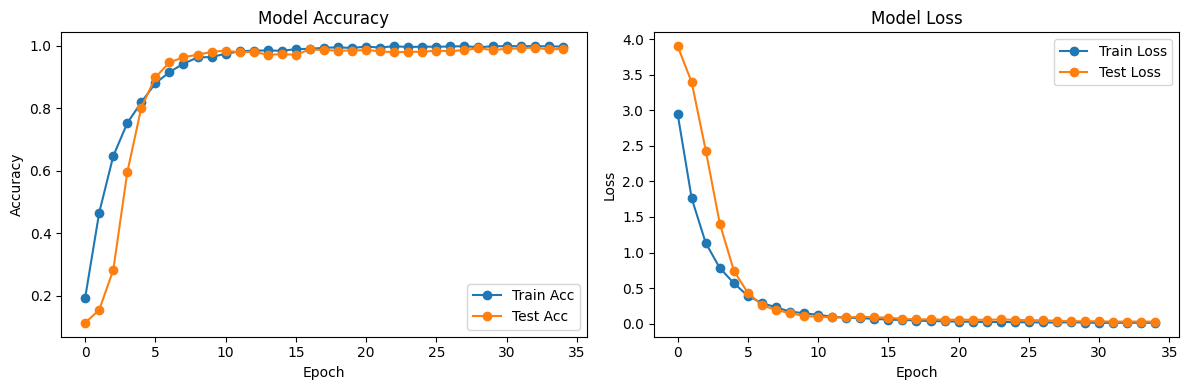

In [111]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = history_v4.history.get('accuracy', [])
test_acc = history_v4.history.get('val_accuracy', [])
loss = history_v4.history.get('loss', [])
test_loss = history_v4.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Train and Test Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Acc', marker='o')
plt.plot(epochs_range, test_acc, label='Test Acc', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Train and Test Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss', marker='o')
plt.plot(epochs_range, test_loss, label='Test Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [112]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 374ms/step - accuracy: 0.9935 - loss: 0.0245
Loss: 0.02839614450931549
Accuracy: 0.9905123114585876


In [113]:
import tensorflow as tf

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print metrik evaluasi
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Log Loss: {log_loss_value}")
print(f"Accuracy: {accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 597ms/step
Precision: 0.9911078674646037
Recall: 0.9905123339658444
F1 Score: 0.9906041924238506
Log Loss: 2.0977897635663956
Accuracy: 0.9905123339658444


              precision    recall  f1-score   support

          ba       1.00      1.00      1.00        28
          ca       1.00      1.00      1.00        28
          da       1.00      1.00      1.00        26
         dha       1.00      0.97      0.99        36
          ga       1.00      1.00      1.00        24
          ha       0.92      1.00      0.96        24
          ja       1.00      1.00      1.00        27
          ka       0.95      0.95      0.95        20
          la       1.00      0.97      0.98        32
          Ma       1.00      1.00      1.00        27
          na       1.00      0.97      0.98        30
         nga       1.00      1.00      1.00        17
         nya       1.00      1.00      1.00        28
          pa       0.92      1.00      0.96        23
          ra       1.00      1.00      1.00        21
          sa       1.00      1.00      1.00        24
          ta       1.00      0.96      0.98        26
         tha       1.00    

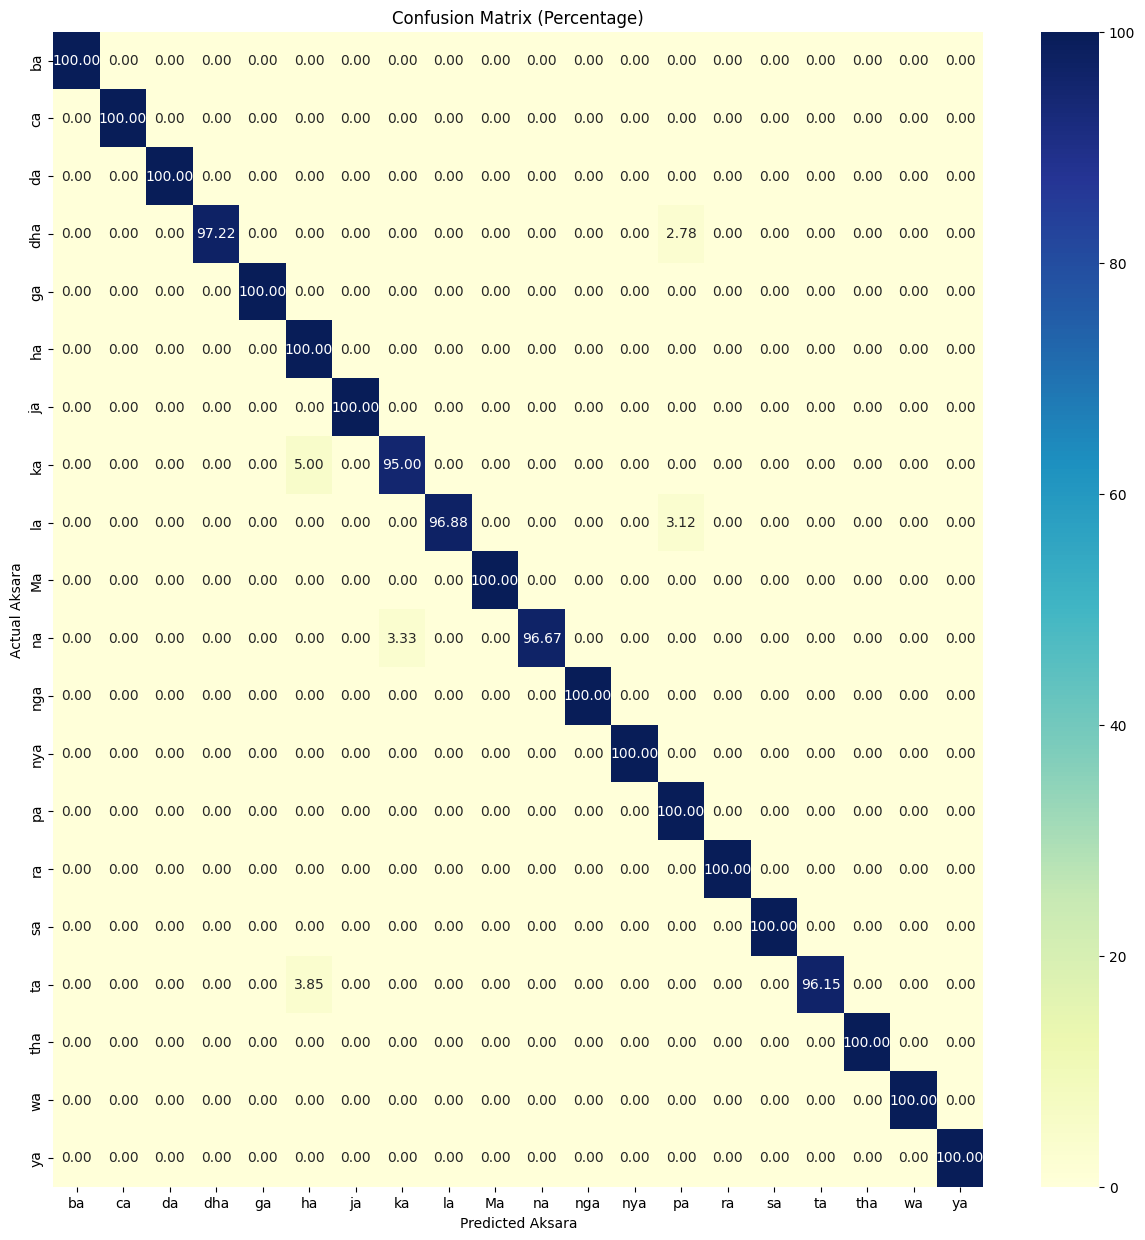

In [114]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
total_per_class = np.sum(conf_matrix, axis=1)
cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

plt.figure(figsize=(15, 15))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()